In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # To save the model

# Load the dataset (if not already in memory)
file_path = "datap/processed_clinical_result.csv"
df = pd.read_csv(file_path)

# Define features (X) and target (y)
X = df.drop(columns=["label"])
y = df["label"]


In [2]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Train-Test Split Done: {X_train.shape[0]} Train Samples, {X_test.shape[0]} Test Samples")


✅ Train-Test Split Done: 641 Train Samples, 161 Test Samples


In [3]:
# Define Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")

# Train the model
rf_model.fit(X_train, y_train)

print("✅ Random Forest Model Trained Successfully!")


✅ Random Forest Model Trained Successfully!


In [4]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {accuracy:.4f}")

# Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Random Forest Accuracy: 0.9317

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       118
           1       0.86      0.88      0.87        43

    accuracy                           0.93       161
   macro avg       0.91      0.92      0.91       161
weighted avg       0.93      0.93      0.93       161


🔍 Confusion Matrix:
[[112   6]
 [  5  38]]


In [5]:
# Save trained Random Forest model
model_path = "models/random_forest_model.pkl"
joblib.dump(rf_model, model_path)

print(f"✅ Model Saved at: {model_path}")


✅ Model Saved at: models/random_forest_model.pkl


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort by importance
feature_imp_df = feature_imp_df.sort_values(by="Importance", ascending=False)

# Display top 10 features
print("🔍 Top 10 Most Important Features:")
print(feature_imp_df.head(10))


🔍 Top 10 Most Important Features:
                   Feature  Importance
14     Normalized_Position    0.194505
15   mc_synonymous_variant    0.174224
0                 position    0.167552
20             mc_nonsense    0.109840
22     mc_missense_variant    0.098358
26                  Prev_G    0.023514
17  mc_5_prime_UTR_variant    0.021525
21       mc_intron_variant    0.020052
16  mc_3_prime_UTR_variant    0.018935
32      Mutation_Frequency    0.018775


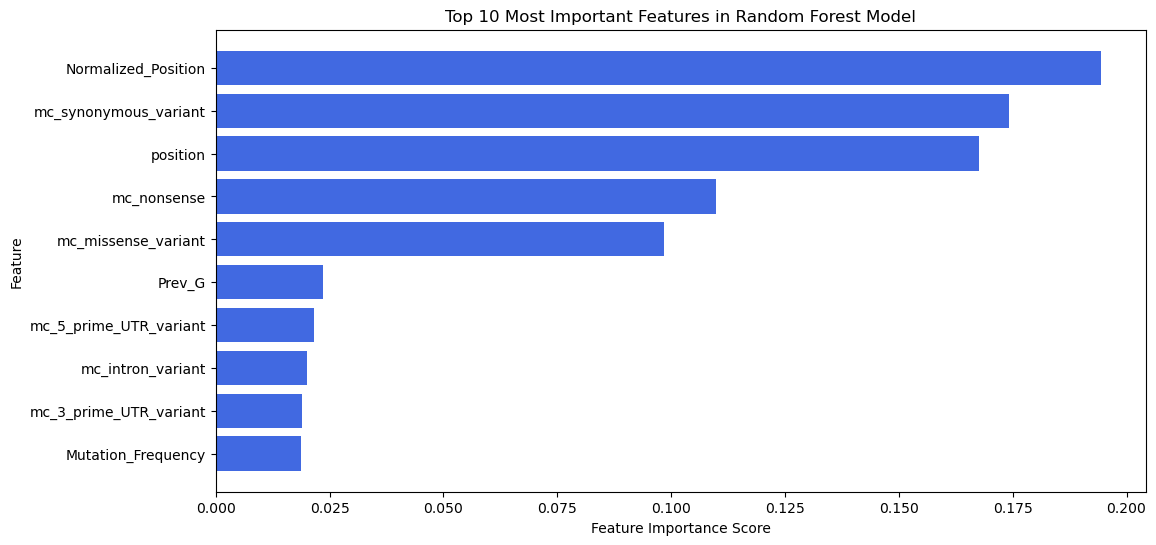

In [7]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_imp_df["Feature"][:10], feature_imp_df["Importance"][:10], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features in Random Forest Model")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define k for k-fold cross-validation
k = 5  # Change as needed

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Cross-validation accuracy scores: [0.93167702 0.94409938 0.95       0.9125     0.93125   ]
Mean accuracy: 0.9339
Standard deviation: 0.0129
